<a href="https://colab.research.google.com/github/scarlett-plaza/TN1-EDO/blob/master/tarea-numerica-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# -*- coding: utf-8 -*-
"""
En este archivo debe implementar todos los métodos que se indican
para resolver la tarea.
Usted es libre de implementar nuevas funciones si lo estima conveniente.
La librería numpy contiene varios métodos ya implementados que pueden
resultarle útiles.
Las funciones siguientes (salvo funcionEjemplo) deben ser completadas,
cambiando la linea pass por return en donde considere necesario.
No elimine nada de lo que viene escrito originalmente.
Escriba los docstring de las funciones implementadas tal como en
el ejemplo.
"""

import numpy as np

G=6.67*(10**(-11))
M=(1/6.67)*(10**11)
m=1
global G,M,m

def funcionEjemplo(n, x):
    """
    El texto que se escribe en este bloque de comentarios es mostrado al
    utilizar el comando help(funcionEjemplo).
    En la primera parte se describe de modo general el funcionamiento de
    la función, en los términos más simples posibles.
    Note que en este ejemplo el nombre de la función no es descriptivo.
    Esta función calcula x^n*cos(x)
    Inputs:
    =======
    n [int]: Grado del coeficiente
    x [np.ndarray]: Puntos a calcular
    Output:
    =======
    valor [np.ndarray]: Evaluación de la función
    """
    valor = np.power(x, n)*np.cos(x)
    return valor
  
###########################################################
# Desde esta parte debe comenzar a completar ##############
###########################################################


def ecuacionDeMovimiento(t, estado):
    """
    Implementa la ecuación de movimiento, como sistema de ecuaciones de
    primer orden. D = estado (vector)
    Escribiendo D' = f(t,D), retorna el valor de f(t, D) (vector)
    """
    x=estado[0] #recupera del vector estado la informacion de x
    y=estado[1] #recupera del vector estado la informacion de y
    dx=estado[2] #recupera del vector estado la informacion de vx
    dy=estado[3] #recupera del vector estado la informacion de vy
    dvx=-G*M*x/((x**2+y**2)**(3/2.)) #define la derivada de la velocidad en x
    dvy=-G*M*y/((x**2+y**2)**(3/2.)) #define la derivada de la velocidad en y
    ft=np.array([dx,dy,dvx,dvy]) #define el vector estado derivado
    f=np.array([t,ft]) #crea un arreglo con el tiempo en el cual se está evaluando el estado y el estado en ese tiempo
    return f   
   


def pasoEuler(ecMovimiento, dt, t, estado):
    """
    Calcula el paso para el método de Euler
    """
    PE=dt*ecuacionDeMovimiento(t,estado)[1] #dado el estado en un tiempo define el paso de euler para ese tiempo
    return PE


def pasoHeun(ecMovimiento, dt, t, estado):
    """
    Calcula el paso para el método de Heun
    """
    XGorrito=estado+pasoEuler(ecMovimiento,dt,t,estado) #define un nuevo valor de estado sacado con el paso de Euler
    f1=ecuacionDeMovimiento(t,XGorrito) #saca la ecuacion de movimiento para el nuevo valor y el tiempo t
    ec=ecuacionDeMovimiento(t,estado) #saca la funcion de movimiento para un tiempo t y el valor inicial del estado
    PH=(dt/2)*(ec+f1)[1] #calcula el paso de Heun
    return PH


def pasoRK4(ecMovimiento, dt, t, estado):
    """
    Calcula el paso para el método RK4
    """
    f1=ecuacionDeMovimiento(t,estado) #define la ecuacion de movimiento en un tiempo t
    f2=ecuacionDeMovimiento(t+dt/2,estado+dt/2*f1[1]) #define una ecuacion de movimiento en un tiempo t+dt/2 y un estado avanzado en dt/2*f1
    f3=ecuacionDeMovimiento(t+dt/2,estado+dt/2*f2[1]) #define una ecuacion de movimiento en un tiempo t+dt/2 y un estado avanzado en dt/2*f2
    f4=ecuacionDeMovimiento(t+dt,estado+dt*f3[1]) #define una ecuacion de movimiento enun tiempo t+dt y un estado avanzado en dt*f3
    PRK4=dt*((f1[1]+2*f2[1]+2*f3[1]+f4[1])/6) #calcula el paso de RK4
    return  PRK4


def solveEuler(e0, ecMovimiento, dt, T):
    """
    Recibe una condición inicial, la ecuación de movimiento, un paso dt
    y un tiempo final.
    Retorna la trayectoria del estado en los tiempos hasta T
    Usa su respectiva función de paso (no lo calcule acá)
    """
    N=int(T/dt) #cuenta la cantidad de iteraciones que se deben hacer
    A=np.zeros([N,4]) #crea una matriz de Nx4 para guardar la informacion de las iteraciones
    A[0]=e0 #define la condicion inicial
    i=1 #contador
    while i<len(A):
      ti=i*dt #define el tiempo en i 
      Xeuler=A[i-1]+pasoEuler(ecMovimiento,dt,ti,A[i-1]) #calcula el valor de la funcion en el tiempo ti
      A[i]=Xeuler #guarda la informacion en el vector A
      i=i+1 #hace avanzar el contador
    return A
      

def solveHeun(e0, ecMovimiento, dt, T):
    """
    Recibe una condición inicial, la ecuación de movimiento, un paso dt
    y un tiempo final.
    Retorna la trayectoria del estado en los tiempos hasta T
    Usa su respectiva función de paso (no lo calcule acá)
    """
    N=int(T/dt) #cuenta la cantidad de iteraciones que se deben hacer
    A=np.zeros([N,4]) #crea una matriz de Nx4 para guardar la informacion de las iteraciones
    A[0]=e0 #define la condicion inicial
    i=1 #contador
    while i<len(A):
      ti=i*dt #define el tiempo en i 
      Xheun=A[i-1]+pasoHeun(ecMovimiento,dt,ti,A[i-1]) #calcula el valor de la funcion en el tiempo ti
      A[i]=Xheun #guarda la informacion en el vector A
      i=i+1 #hace avanzar el contador
    return A


def solveRK4(e0, ecMovimiento, dt, T):
    """
    Recibe una condición inicial, la ecuación de movimiento, un paso dt
    y un tiempo final.
    Retorna la trayectoria del estado en los tiempos hasta T
    Usa su respectiva función de paso (no lo calcule acá)
    """
    N=int(T/dt) #cuenta la cantidad de iteraciones que se deben hacer
    A=np.empty([N,4]) #crea una matriz de Nx4 para guardar la informacion de las iteraciones
    A[0]=e0 #define la condicion inicial
    i=1 #contador
    while i<len(A):
      ti=i*dt #define el tiempo en i 
      Xrk4=A[i-1]+pasoRK4(ecMovimiento,dt,ti,A[i-1]) #calcula el valor de la funcion en el tiempo ti
      A[i]=Xrk4 #guarda la informacion en el vector A
      i=i+1 #hace avanzar el contador
    return A


def energiaTotal(x, y, vx, vy):
    """
    Calcula la energía total del sistema en las condiciones actuales.
    Retorna el valor de la energía total en el punto
    """
    K=(vx**2+vy**2)/2. #calcula la energia cinética
    U=(G*M*m)/np.sqrt(x**2+y**2) #calcula la energía potencial
    E=K+U #calcula la energia total
    return E


In [17]:
e0=np.array([10,0,0,0.3])
estado=np.array([10,0,0,0.3])
ecMovimiento=ecuacionDeMovimiento(0,estado)
solveEuler(e0,ecMovimiento,1,2500)




array([[ 1.00000000e+01,  0.00000000e+00,  0.00000000e+00,
         3.00000000e-01],
       [ 1.00000000e+01,  3.00000000e-01, -1.00000000e-02,
         3.00000000e-01],
       [ 9.99000000e+00,  6.00000000e-01, -1.99865152e-02,
         2.99700405e-01],
       ...,
       [ 3.06743645e+01, -5.15639630e-01, -1.60581647e-02,
         1.61522000e-01],
       [ 3.06583063e+01, -3.54117630e-01, -1.71205078e-02,
         1.61539859e-01],
       [ 3.06411858e+01, -1.92577771e-01, -1.81842019e-02,
         1.61552145e-01]])

In [43]:
e0=np.array([10,0,0,0.3])
estado=np.array([10,0,0,0.3])
ecMovimiento=ecuacionDeMovimiento(0,estado)
solveHeun(e0,ecMovimiento,1,2500)

array([[ 1.00000000e+01,  0.00000000e+00,  0.00000000e+00,
         3.00000000e-01],
       [ 9.99500000e+00,  3.00000000e-01, -9.99325759e-03,
         2.99850202e-01],
       [ 9.98000849e+00,  5.99700180e-01, -1.99795055e-02,
         2.99400525e-01],
       ...,
       [-7.68078194e+00,  2.96248335e+00, -1.23785855e-01,
        -3.43298746e-01],
       [-7.79768424e+00,  2.61652961e+00, -1.09907929e-01,
        -3.48301023e-01],
       [-7.90058516e+00,  2.26587737e+00, -9.57990404e-02,
        -3.52689357e-01]])

In [19]:
e0=np.array([10,0,0,0.3])
estado=np.array([10,0,0,0.3])
ecMovimiento=ecuacionDeMovimiento(0,estado)
solveRK4(e0,ecMovimiento,1,2500)

array([[ 1.00000000e+01,  0.00000000e+00,  0.00000000e+00,
         3.00000000e-01],
       [ 9.99500029e+00,  2.99949998e-01, -9.99883331e-03,
         2.99850001e-01],
       [ 9.98000467e+00,  5.99600004e-01, -1.99906642e-02,
         2.99400020e-01],
       ...,
       [-8.18141750e+00,  8.47921082e-02, -3.45410331e-03,
        -3.66648789e-01],
       [-8.17740305e+00, -2.81822505e-01,  1.14814167e-02,
        -3.66468909e-01],
       [-8.15846374e+00, -6.47922802e-01,  2.63897079e-02,
        -3.65620452e-01]])

Text(0, 0.5, 'Posición en Y')

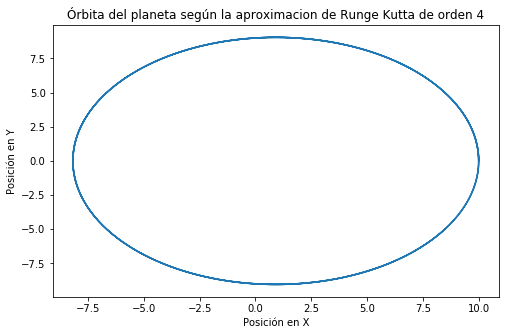

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5)) #crea una figura para hacer el grafico
a=solveRK4(e0,ecMovimiento,1,500) #crea un vector con la solucion de Runge Kutta
t=np.arange(0,500,1) #crea un vector con los tiempos 
X=np.empty(len(t)) #se crea un vector vacio para guardar los datos de x
Y=np.empty(len(t)) #se crea un vector para guardar los datos de y
VX=np.empty(len(t)) #se crea un vector para guardar los datos de vx
VY=np.empty(len(t)) #se crea un vector para guardar los datos de vy
i=0 #contador
while i<len(t):
  x=a[i][0] #define x segun su valor en ese tiempo
  y=a[i][1] #define y segun su valor en ese tiempo
  vx=a[i][2] #define vx segun su valor en ese tiempo
  vy=a[i][3] #define vy segun su valor en ese tiempo
  X[i]=x #guarda el valor de x 
  Y[i]=y #guarda el valor de y
  VX[i]=vx #guarda el valor de vx
  VY[i]=vy #guarda el valor de vy
  i+=1 #avanza el contador
plt.plot(X,Y) #grafica los valores de X en funcion de Y
plt.title("Órbita del planeta según la aproximacion de Runge Kutta de orden 4") #agrega el titulo
plt.xlabel("Posición en X") #etiqueta el eje x
plt.ylabel("Posición en Y") #etiqueta el eje y

In [1]:
ET=np.empty(len(t)) #crea un vector donde se guardara la informacion sobre la energia
j=0 #contador
while j<len(t):
  et=energiaTotal(X[j],Y[j],VX[j],VY[j]) #calcula la energia
  ET[j]=et #guarda el valor de la energia 
  j+=1 #avaza el contador
print("La energía promedio es: "+str(ET.mean())) #muestra el valor de su promedio
print("La desviación estandar de la energía es: "+ str(ET.std())) #muestra el valor de su desviacion estandar

NameError: ignored